** <font size=4>KMeans聚类分析</font> **    

Ref: Gavin Hackeling, Mastering Machine Learning with scikit-learn, 2014

X:
 [[ 1.06836395  0.78191495]
 [ 0.9439976   0.72373815]
 [ 1.47850023  1.20076746]
 [ 1.49451661  1.00874587]
 [ 0.57133742  1.0445952 ]
 [ 0.59732922  0.91608164]
 [ 1.38157623  1.43704899]
 [ 0.69156398  1.07902845]
 [ 0.96756243  1.10054799]
 [ 1.32732882  1.19529264]
 [ 4.19404512  3.76841551]
 [ 3.75721923  4.35137916]
 [ 4.16876694  4.09673181]
 [ 4.40440398  4.10403892]
 [ 3.86017749  4.43716733]
 [ 4.07208345  3.84202224]
 [ 3.99045652  3.68395453]
 [ 3.75477453  4.45859019]
 [ 3.56638807  4.28992756]
 [ 4.24647347  4.27740338]]


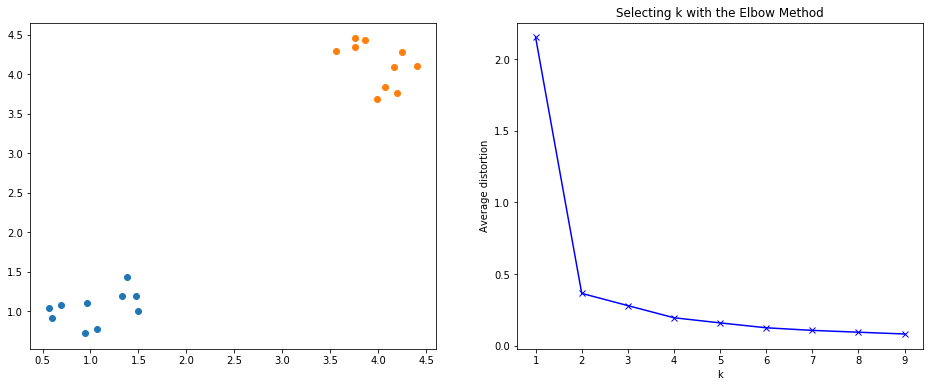

In [1]:
# 聚类分析指将物理或抽象对象的集合分组为由类似的对象组成的多个类的分析过程，主要用来探测数据集，是无监督学习方法。
# K-Means的初始重心位置是随机选择的。有时，如果运气不好，随机选择的重心会导致K-Means陷入局部最优解
'''
Elbow method
假设K是聚类的分类的个数，如果问题中没有指定K的值，可以通过肘部法则这一技术来估计聚类数量。
肘部法则会把不同K值的成本函数(cost function)值画出来。随着K值的增大，平均畸变程度会减小；每个类包含的样本数会减少，于是样本离其重心会更近。
但是，随着K值继续增大，平均畸变程度的改善效果会不断减低。 K值增大过程中，畸变程度的改善效果下降幅度最大的位置对应的K值就是肘部。
'''

import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
X = np.hstack((cluster1, cluster2)).T
print('X:\n', X)

K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    # cdist函数用于计算两个输入集合的距离，通过metric参数指定计算距离的不同方式得到不同的距离度量值   
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

fig = plt.figure(1,(16,6))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(cluster1[0], cluster1[1])
ax1.scatter(cluster2[0], cluster2[1])

ax2 = fig.add_subplot(1,2,2)
ax2.plot(K, meandistortions, 'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('Average distortion')
ax2.set_title('Selecting k with the Elbow Method')
plt.show()

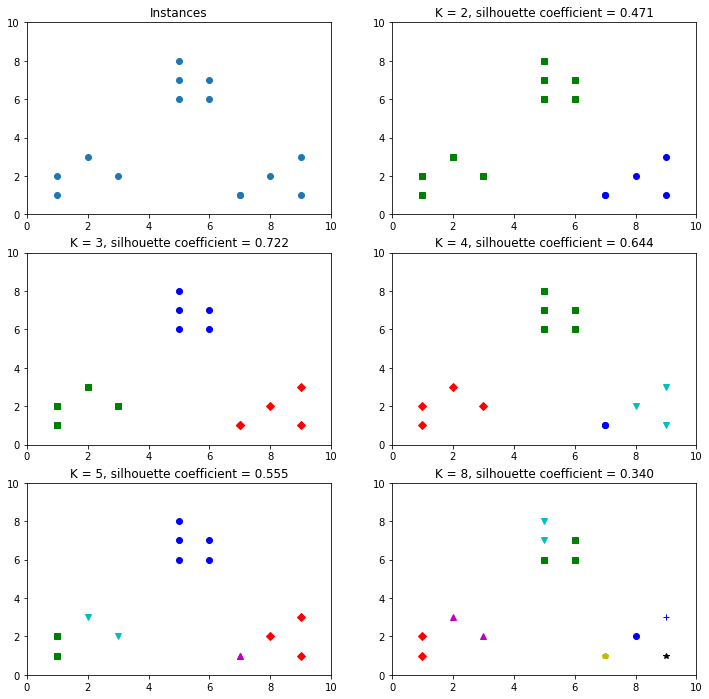

In [2]:
# KMeans的评估采用轮廓函数 
'''
对于第i个对象，计算它到所属簇中所有其他对象的平均距离，记ai（体现凝聚度）
对于第i个对象和不包含该对象的任意簇，计算该对象到给定簇中所有对象的平均距离，记bi（体现分离度）
第i个对象的轮廓系数为si=(bi-ai)/max(ai,bi)  
'''

from sklearn import metrics

fig = plt.figure(1, (12,12))
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.column_stack((x1, x2))
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
        plt.xlim([0, 10])
        plt.ylim([0, 10])
        plt.title('K = %s, silhouette coefficient = %.3f' %(t, metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))

plt.show()